In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

# Load the data
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

# EDA
print("--- Data Info ---")
print(df.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None



Missing Values per Column:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_15580\3013112501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='magma')


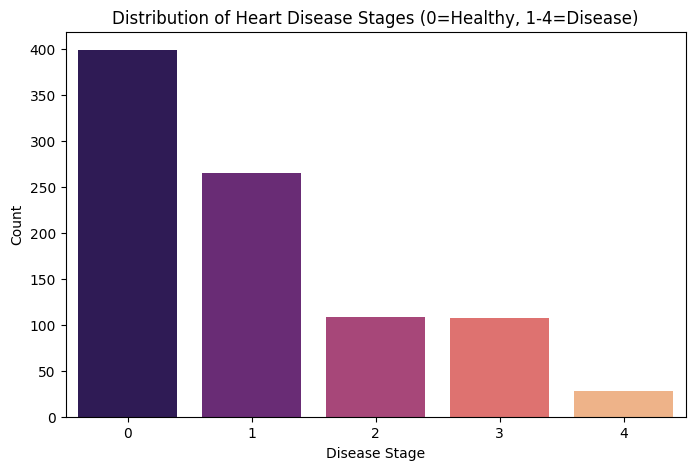

In [2]:
# Check for missing values
df = df.replace('?', np.nan)
print("\nMissing Values per Column:\n", df.isnull().sum())

# Visualize Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=df, palette='magma')
plt.title("Distribution of Heart Disease Stages (0=Healthy, 1-4=Disease)")
plt.xlabel("Disease Stage")
plt.ylabel("Count")
plt.show()

In [3]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df.drop(columns=['num']), columns=cat_cols, drop_first=True)

print("Columns after encoding:", df_encoded.columns)

Columns after encoding: Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'target',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping',
       'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [4]:
# Split data
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
y_pred = dt_model.predict(X_test)
print(f"Initial Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Initial Accuracy: 0.7363
              precision    recall  f1-score   support

           0       0.71      0.79      0.74        89
           1       0.77      0.69      0.73        93

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



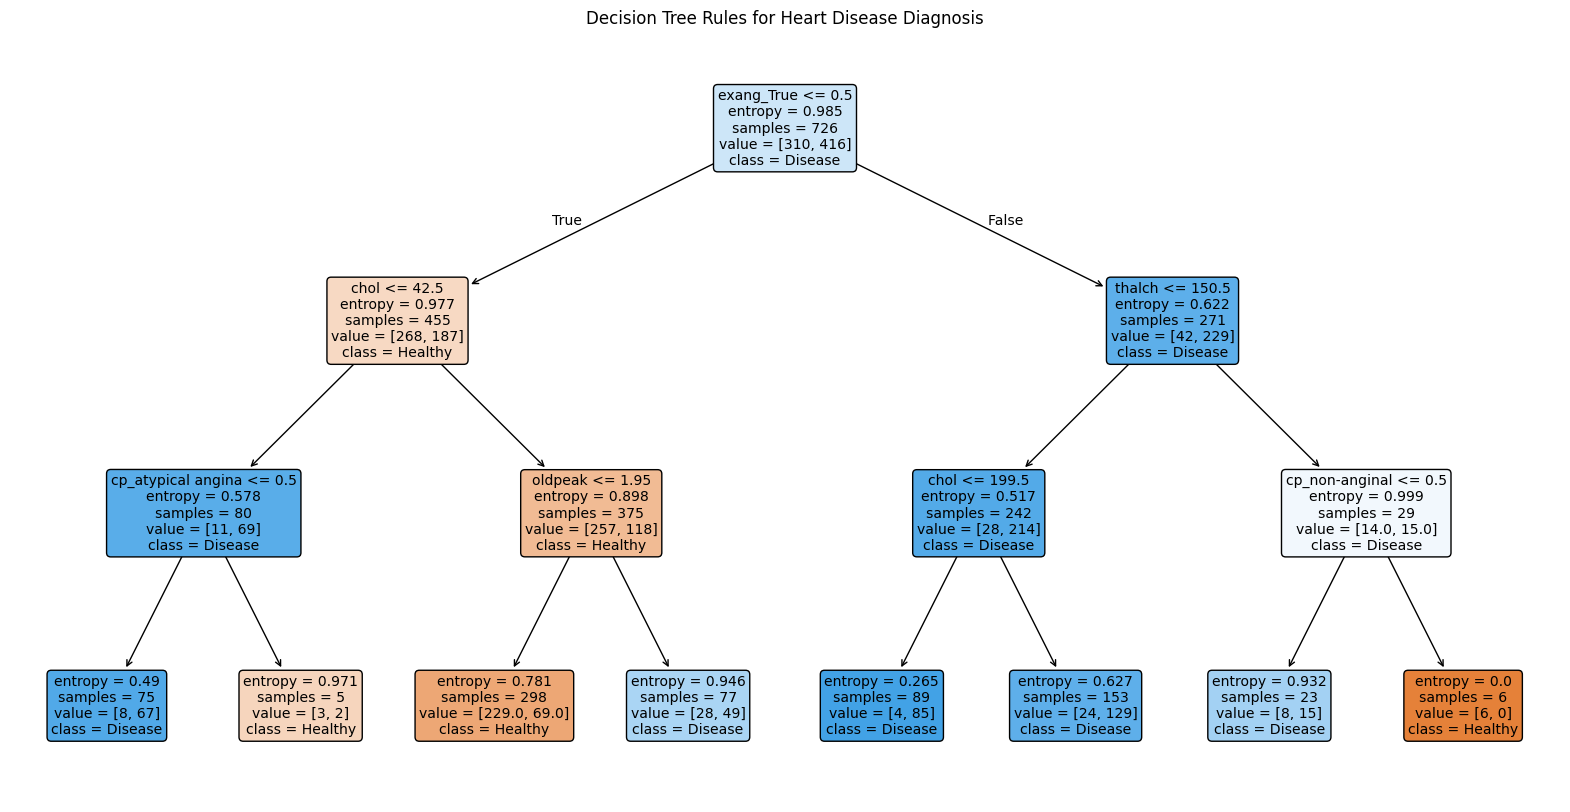

Tuned Accuracy: 0.7912


In [5]:
# Tuning
tuned_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10, random_state=42)
tuned_model.fit(X_train, y_train)

# Visualizing the Tree
plt.figure(figsize=(20,10))
plot_tree(tuned_model, feature_names=X.columns, class_names=['Healthy', 'Disease'], filled=True, rounded=True)
plt.title("Decision Tree Rules for Heart Disease Diagnosis")
plt.show()

# Final accuracy check
print(f"Tuned Accuracy: {tuned_model.score(X_test, y_test):.4f}")

## Interview Questions:

1. Common hyperparameters of a Decision Tree include max_depth, min_samples_split, min_samples_leaf, and criterion.

max_depth controls how deep the tree can grow and helps prevent overfitting.
min_samples_split and min_samples_leaf control how many samples are required to split nodes, which improves generalization.
criterion such as gini or entropy decides how the best split is chosen.
Proper tuning of these hyperparameters helps balance the complexicity and accuracy.

2. Difference between Label Encoding and One-Hot Encoding
    Label Encoding converts categorical values into numerical labels, while One-Hot Encoding creates separate binary columns for each category.

Label Encoding is suitable for tree-based models because they do not assume order, whereas One-Hot Encoding avoids introducing false ordinal relationships and is preferred for linear models.

One-Hot Encoding increases dimensionality, while Label Encoding keeps the data compact.